##Impoting Datasets Directly from Kaggle!

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahithaguduru","key":"2aa7cb88fbdb6a5f016993e956236f6a"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:16<00:00, 127MB/s]
100% 2.70G/2.70G [00:16<00:00, 179MB/s]


In [6]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

##Importing Libraries!

In [7]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [8]:
train_gen = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [9]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 85, 85, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 85, 85, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 9, 9, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 9, 9, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 9, 9, 512)           │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 9, 9, 512)           │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1568)                │      65,029,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          59,622 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,092,966 (290.27 MB)

 Trainable params: 76,092,966 (290.27 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
ep = 10
history = model.fit(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 362s 156ms/step - accuracy: 0.2659 - loss: 2.6161 - val_accuracy: 0.8245 - val_loss: 0.5548
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 335s 142ms/step - accuracy: 0.8165 - loss: 0.5815 - val_accuracy: 0.9027 - val_loss: 0.3037
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 323s 142ms/step - accuracy: 0.8899 - loss: 0.3338 - val_accuracy: 0.9002 - val_loss: 0.3092
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 313s 143ms/step - accuracy: 0.9234 - loss: 0.2331 - val_accuracy: 0.9297 - val_loss: 0.2156
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 322s 143ms/step - accuracy: 0.9439 - loss: 0.1706 - val_accuracy: 0.9360 - val_loss: 0.1910
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 322s 143ms/step - accuracy: 0.9561 - loss: 0.1333 - val_accuracy: 0.9189 - val_loss: 0.2549
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 311s 142ms/step - accuracy: 0.9678 - loss: 0.0985 - val_accuracy: 0.9564 - val_loss: 0.1441
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 312s 142ms/step - ac

In [11]:
model.save('cnn_0.9804.keras')

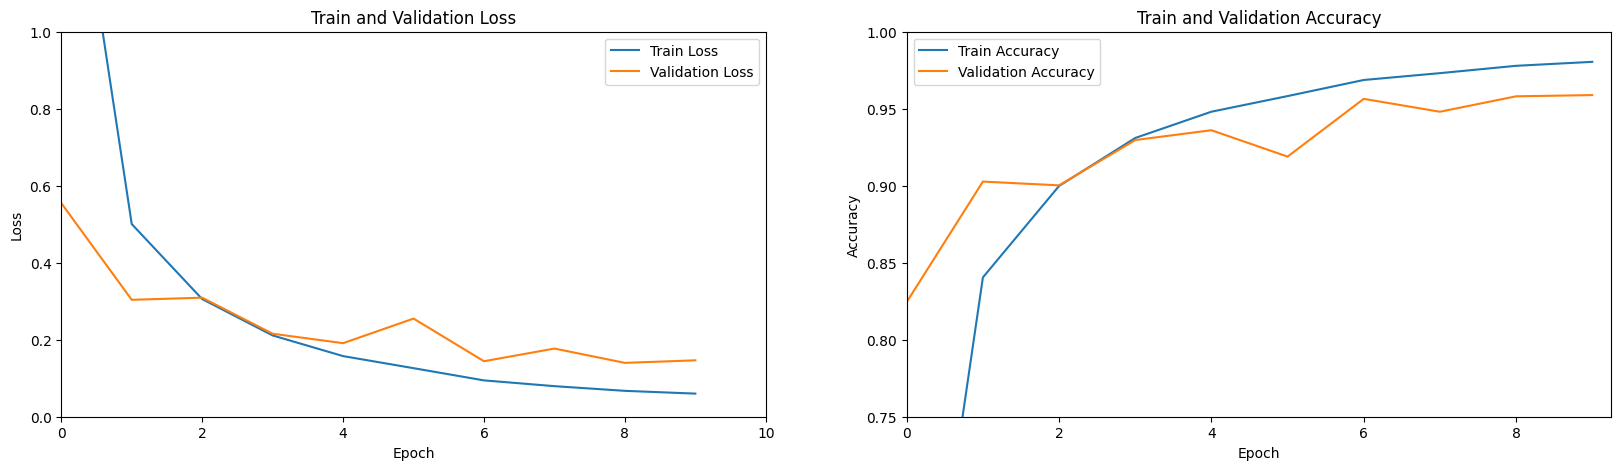

In [17]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()

In [19]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1

In [20]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [21]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.04 %
Test Accuracy   : 95.89 %
Precision Score : 95.89 %
Recall Score    : 95.89 %


Found 17572 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.
17572/17572 ━━━━━━━━━━━━━━━━━━━━ 103s 6ms/step
True Positives: [153 464 197   0 281   5  23 108 434   0 439   0 317  57   0   0 105 382
 140 469  33   0 342 120   0   0  95  28   0  54   5   0 205   0 109   5
 325 331]
False Positives: [ 413 2158  321    0  205    2   47   55  158    0   35    0  156    0
    0    0    0  682  315 2992    1    0 1631  320    0    0  274    9
    0  200    9    2  781    0  219    0  872  489]
True Negatives: [16655 14917 16811 17070 16913 17149 17069 17107 16937 17095 17072 17100
 16936 17142 17149 17069 17113 16458 16779 14083 17086 17087 15485 16807
 17067 17138 16854 17107 17147 16892 17100 17100 16355 17137 16896 17082
 16252 16602]
False Negatives: [351  33 243 502 173 416 433 302  43 477  26 472 163 373 423 503 354  50
 338  28 452 485 114 325 505 434 349 428 425 426 458 470 231 435 348 485
 123 150]
                                                    precision 

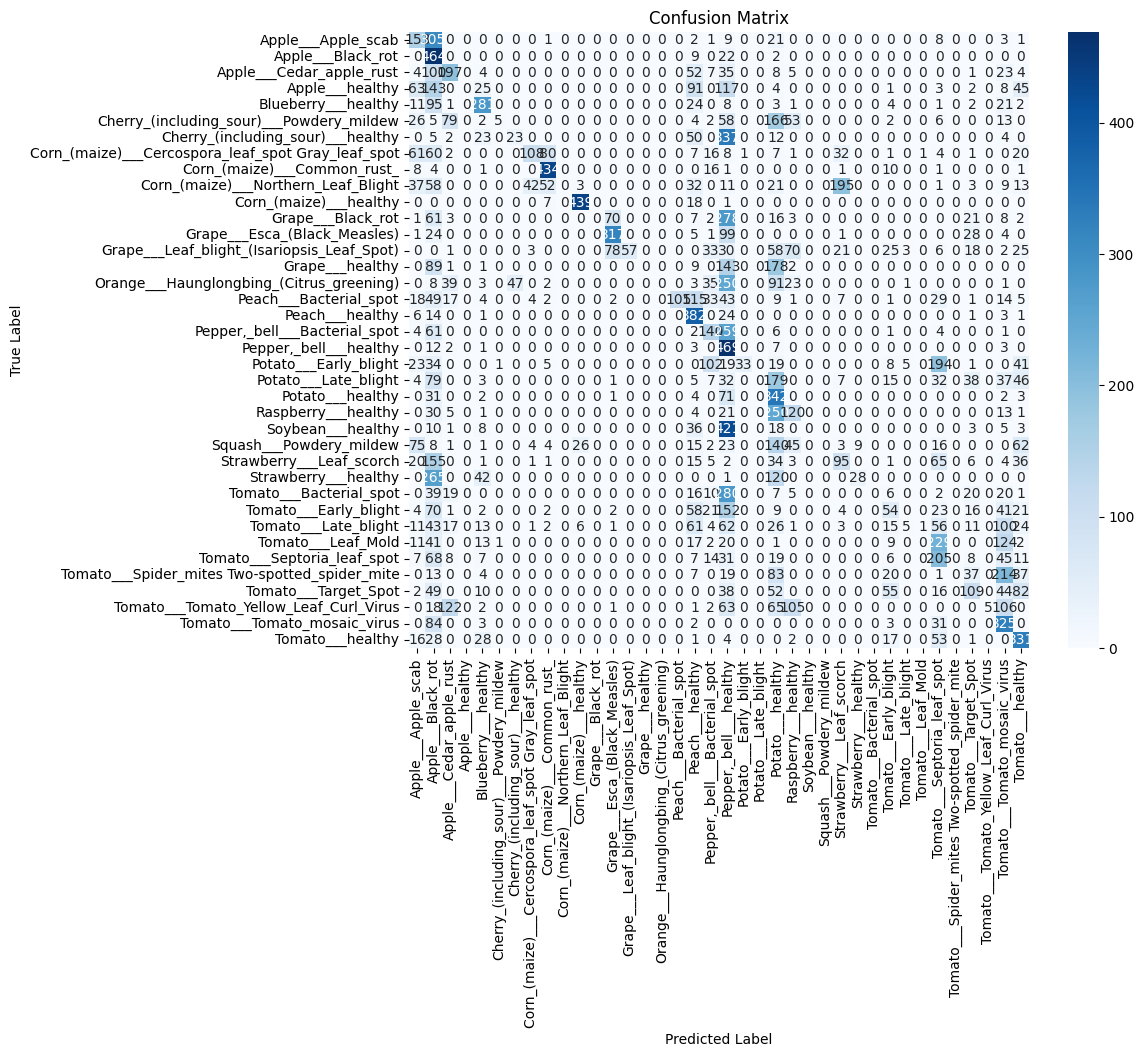

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/cnn_0.9804.keras')
valid='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
# Load the test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256,256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
# Get the class names
class_names = test_set.class_names

# Predict on the test set
y_pred = model.predict(test_set)
predicted_categories = np.argmax(y_pred, axis=1)

# Get the true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = np.argmax(true_categories, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Extract TP, FP, TN, FN
TP = np.diag(cm)  # True Positives
FP = np.sum(cm, axis=0) - TP  # False Positives
FN = np.sum(cm, axis=1) - TP  # False Negatives
TN = np.sum(cm) - (TP + FP + FN)  # True Negatives

print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)

# Print classification report
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


True Positives (TP): [153 464 197   0 281   5  23 108 434   0 439   0 317  57   0   0 105 382
 140 469  33   0 342 120   0   0  95  28   0  54   5   0 205   0 109   5
 325 331]
False Positives (FP): [ 413 2158  321    0  205    2   47   55  158    0   35    0  156    0
    0    0    0  682  315 2992    1    0 1631  320    0    0  274    9
    0  200    9    2  781    0  219    0  872  489]
True Negatives (TN): [16655 14917 16811 17070 16913 17149 17069 17107 16937 17095 17072 17100
 16936 17142 17149 17069 17113 16458 16779 14083 17086 17087 15485 16807
 17067 17138 16854 17107 17147 16892 17100 17100 16355 17137 16896 17082
 16252 16602]
False Negatives (FN): [351  33 243 502 173 416 433 302  43 477  26 472 163 373 423 503 354  50
 338  28 452 485 114 325 505 434 349 428 425 426 458 470 231 435 348 485
 123 150]


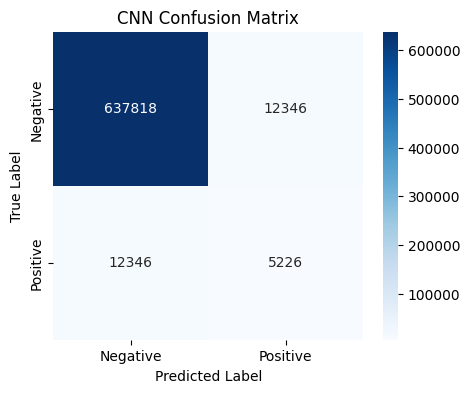

In [25]:
cm = confusion_matrix(Y_true, predicted_categories)

# Initialize TP, FP, TN, FN for each class
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

# Summing up across all classes for overall TP, FP, TN, FN
total_TP = np.sum(TP)
total_FP = np.sum(FP)
total_TN = np.sum(TN)
total_FN = np.sum(FN)

# Confusion matrix visualization (single 2x2 box for overall results)
cm_2x2 = np.array([[total_TN, total_FP], [total_FN, total_TP]])

plt.figure(figsize=(5, 4))
sns.heatmap(cm_2x2, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()
